# 利用AdaBoost元算法提高分类性能

**元算法(meta-algorithm)是对其他算法进行组合的一种方式**。集中关注一个称作**AdaBoost的最流行的元算法**。某些人认为AdaBoost是最好的监督学习的方法，所以该方法是机器学习工具箱中最强有力的工具之一。

先讨论不同分类器的集成方法，然后**主要关注boosting方法及其代表分类器Adaboost**。接下来AdaBoost算法将应用在上述单层决策树分类器之上。

最后讨论所有分类器都会遇到的一个通用问题：非均衡分类问题。**需要利用修改后的指标来评价分类器的性能**。而就这个问题而言，并非AdaBoost所独用。

## 基于数据集多重抽样的分类器

自然可以将不同的分类器组合起来，而这种组合结果则被称为集成方法(ensemble method)或者元算法。**使用集成方法时会有多种形式**：可以是不同算法的集成，也可以是同一算法在不同设置下的集成，还可以是数据集不同部分分配给不同分类器之后的集成。

|AdaBoost||
|:-|:-|
|优点|泛化错误率低，易编码，可以应用在大部分分类器上，无参数调整|
|缺点|对离群点敏感|
|适用数据类型|数值型和标称型数据|

### bagging：基于数据随机重抽样的分类器构建方法

自举汇聚法(bootstrap aggregating)，也称为**bagging方法，是在从原始数据集选择S次后得到S个新数据集的一种技术**。新数据集和原数据集的大小相等。随机抽样---可以多次地选择同一样本。这一性质就允许新数据集中可以有重复的值，而原始数据集的某些值在新集合中则不再出现。  
在S个数据集建好之后，将某个学习算法分别作用于每个数据集就得到了S个分类器。当我们要对新数据进行分类时，就可以应用这S个分类器进行分类。与此同时，选择分类器投票结果中最多的类别作为最后的分类结果。

### boosting

**不论是在boosting还是bagging当中，所使用的多个分类器的类型都是一致的**前者不同的分类器是通过串行训练而获得的，每个新分类器都根据已训练出的分类器的性能来进行训练。**boosting是通过集中关注被已有分类器错分的那些数据来获得新的分类器。**

由于boosting分类的结果是基于所有分类器的加权求和结果的，bagging中的分类器权重是相等的，而**boosting中的分类器权重并不相等，每个权重代表的是其对应分类器在上一轮迭代中的成功度。**  
boosting方法拥有多个版本，本章将只关注其中一个最流行的版本AdaBoost。

|AdaBoost的一般流程||
|:-|:-|
|收集数据|可以使用任意方法|
|准备数据|依赖于所使用的弱分类器类型，本章使用的是单层决策树，这种分类器可以处理任何数据类型。当然也可以使用任意分类器作为弱分类器，第2章到第6章中的任一分类器都可以充当弱分类器。作为弱分类器，简单分类器的效果更好|
|分析数据|可以使用任意方法|
|训练算法|AdaBoost的大部分时间都用在训练上，分类器将多次在同一数据集上训练弱分类器|
|测试算法|计算分类的错误率|
|使用算法|同SVM一样，AdaBoost预测两个类别中的一个。如果想把它应用到多个类别的场合，那么就要像多类SVM中的做法一样对AdaBoost进行修改|

## 训练算法：基于错误提升分类器的性能

能否使用弱分类器和多个实例来构建一个强分类器？这里的“弱”意味着分类器的性能比随机猜测要略好(>0.5)，AdaBoost算法即脱胎于上述理论问题。

AdaBoost是adaptive boosting(自适应boosting)的缩写，**其运行过程如下**：训练数据中的每个样本，并赋予其一个权重，这些权重构成了向量D。一开始，这些权重都初始化成相等值。首先在训练数据上训练出一个弱分类器并计算该分类器的错误率，然后在同一数据集上再次训练弱分类器。**在分类器的第二次训练当中，将会重新调整每个样本的权重，其中第一次分对的样本的权重将会降低，而第一次分错的样本的权重将会提高。**为了从所有弱分类器中得到最终的分类结果，**AdaBoost为每个分类器都分配了一个权重值alpha，这些alpha值是基于每个弱分类器的错误率进行计算的。**其中，错误率ε的定义为：
$$\epsilon =\frac{未正确分类的样本数目}{所以样本数目}$$
而alpha的计算公式如下:
$$\alpha = \frac {1} {2} ln\frac {1-\epsilon} {\epsilon} $$

![图7-1](https://github.com/tw19941212/Graph-bed/raw/master/%E5%9B%BE7-1AdaBoost%E7%AE%97%E6%B3%95%E7%9A%84%E7%A4%BA%E6%84%8F%E5%9B%BE%E3%80%82%E5%B7%A6%E8%BE%B9%E6%98%AF%E6%95%B0%E6%8D%AE%E9%9B%86%EF%BC%8C%E5%85%B6%E4%B8%AD%E7%9B%B4%E6%96%B9%E5%9B%BE%E7%9A%84%E4%B8%8D%E5%90%8C%E5%AE%BD%E5%BA%A6%E8%A1%A8%E7%A4%BA%E6%AF%8F%E4%B8%AA%E6%A0%B7%E4%BE%8B%E4%B8%8A%E7%9A%84%E4%B8%8D%E5%90%8C%E6%9D%83%E9%87%8D%E3%80%82%E5%9C%A8%E7%BB%8F%E8%BF%87%E4%B8%80%E4%B8%AA%E5%88%86%E7%B1%BB%E5%99%A8%E4%B9%8B%E5%90%8E%EF%BC%8C%E5%8A%A0%E6%9D%83%E7%9A%84%E9%A2%84%E6%B5%8B%E7%BB%93%E6%9E%9C%E4%BC%9A%E9%80%9A%E8%BF%87%E4%B8%89%E8%A7%92%E5%BD%A2%E4%B8%AD%E7%9A%84alpha%E5%80%BC%E8%BF%9B%E8%A1%8C%E5%8A%A0%E6%9D%83%E3%80%82%E6%AF%8F%E4%B8%AA%E4%B8%89%E8%A7%92%E5%BD%A2%E4%B8%AD%E8%BE%93%E5%87%BA%E7%9A%84%E5%8A%A0%E6%9D%83%E7%BB%93%E6%9E%9C%E5%9C%A8%E5%9C%86%E5%BD%A2%E4%B8%AD%E6%B1%82%E5%92%8C%EF%BC%8C%E4%BB%8E%E8%80%8C%E5%BE%97%E5%88%B0%E6%9C%80%E7%BB%88%E7%9A%84%E8%BE%93%E5%87%BA%E7%BB%93%E6%9E%9C.jpg)
左边是数据集，其中直方图的不同宽度表示每个样例上的不同权重。在经过一个分类器之后，加权的预测结果会通过三角形中的alpha值进行加权。每个三角形中输出的加权结果在圆形中求和，从而得到最终的输出结果AdaBoost算法的示意图。左边是数据集，其中直方图的不同宽度表示每个样例上的不同权重。在经过一个分类器之后，加权的预测结果会通过三角形中的alpha值进行加权。每个三角形中输出的加权结果在圆形中求和，从而得到最终的输出结果

计算出alpha值之后，可以对权重向量D进行更新，以使得那些正确分类的样本的权重降低而错分样本的权重升高。**D的计算方法如下。**  
如果某个样本被正确分类，那么该样本的权重更改为：
$$D_{i}^{t+1}=\frac{D_{i}^{t}e^{-a}}{Sum(D)}$$
而如果某个样本被错分，那么该样本的权重更改为：
$$D_{i}^{t+1}=\frac{D_{i}^{t}e^{a}}{Sum(D)}$$
在计算出D之后，AdaBoost又开始进入下一轮迭代。AdaBoost算法会不断地重复训练和调整权重的过程，直到训练错误率为0或者弱分类器的数目达到用户的指定值为止。

## 基于单层决策树构建弱分类器

单层决策树(decision stump，也称决策树桩)是一种简单的决策树。仅基于单个特征来做决策。

In [4]:
import numpy as np
# 简单数据集确保算法准备就绪


def loadSimpData():
    dataMat = np.matrix([[1.,  2.1],
                        [2.,  1.1],
                        [1.3,  1.],
                        [1.,  1.],
                        [2.,  1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return dataMat, classLabels

![图7-2](https://github.com/tw19941212/Graph-bed/raw/master/%E5%9B%BE7-2%E7%94%A8%E4%BA%8E%E6%A3%80%E6%B5%8BAdaBoost%E6%9E%84%E5%BB%BA%E5%87%BD%E6%95%B0%E7%9A%84%E7%AE%80%E5%8D%95%E6%95%B0%E6%8D%AE%E3%80%82%E8%BF%99%E4%B8%8D%E5%8F%AF%E8%83%BD%E4%BB%85%E4%BB%85%E9%80%9A%E8%BF%87%E5%9C%A8%E6%9F%90%E4%B8%AA%E5%9D%90%E6%A0%87%E8%BD%B4%E4%B8%8A%E9%80%89%E6%8B%A9%E6%9F%90%E4%B8%AA%E9%98%88%E5%80%BC%E6%9D%A5%E5%B0%86%E5%9C%86%E5%BD%A2%E7%82%B9%E5%92%8C%E6%96%B9%E5%BD%A2%E7%82%B9%E5%88%86%E5%BC%80%E3%80%82AdaBoost%E9%9C%80%E8%A6%81%E5%B0%86%E5%A4%9A%E4%B8%AA%E5%8D%95%E5%B1%82%E5%86%B3%E7%AD%96%E6%A0%91%E7%BB%84%E5%90%88%E8%B5%B7%E6%9D%A5%E6%89%8D%E8%83%BD%E5%AF%B9%E8%AF%A5%E6%95%B0%E6%8D%AE%E9%9B%86%E8%BF%9B%E8%A1%8C%E6%AD%A3%E7%A1%AE%E5%88%86%E7%B1%BB.jpg)
用于检测AdaBoost构建函数的简单数据。这不可能仅仅通过在某个坐标轴上选择某个阈值来将圆形点和方形点分开。AdaBoost需要将多个单层决策树组合起来才能对该数据集进行正确分类

In [2]:
dataMat, classLabels = loadSimpData()

**构建单层决策树伪代码**：  
　将最小错误率minError设为+∞  
　对数据集中的每一个特征(第一层循环)：  
　　对每个步长(第二层循环)：  
　　　对每个不等号(第三层循环)：  
　　　　建立一棵单层决策树并利用加权数据集对它进行测试  
　　　　如果错误率低于minError，则将当前单层决策树设为最佳单层决策树  
　返回最佳单层决策树

In [3]:
# 单层决策树生成函数
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):  # just classify the data
    retArray = np.ones((np.shape(dataMatrix)[0], 1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray


def buildStump(dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m, 1)))
    minError = np.inf  # init error sum, to +infinity
    for i in range(n):  # loop over all dimensions
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):  # loop over all range in current dimension
            for inequal in ['lt', 'gt']:  # go over less than and greater than
                threshVal = (rangeMin + float(j) * stepSize)
                # call stump classify with i, j, lessThan
                predictedVals = stumpClassify(
                    dataMatrix, i, threshVal, inequal)
                errArr = np.mat(np.ones((m, 1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr  # calc total error multiplied by D
                # print "split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f" % (i, threshVal, inequal, weightedError)
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

**stumpClassify()是通过阈值比较对数据进行分类的**。所有在阈值一边的数据会分到类别-1，而在另外一边的数据分到类别+1。

buildStump()将会遍历stumpClassify()函数所有的可能输入值，并找到数据集上最佳的单层决策树。**这里的“最佳”是基于数据的权重向量D来定义的**。bestStump的字典用于存储给定权重向量D时所得到的最佳单层决策树的相关信息。变量numSteps用于在特征的所有可能值上进行遍历。变量minError用于寻找可能的最小错误率。

第一层for循环在数据集的所有特征上遍历。考虑到**数值型的特征，可以通过计算最小值和最大值来了解应该需要多大的步长**。然后，第二层for循环再在这些值上遍历。甚至将阈值设置为整个取值范围之外也是可以的。最后一个for循环则是在大于和小于之间切换不等式。

在嵌套的三层for循环之内，在数据集及三个循环变量上调用stumpClassify()函数。**基于这些循环变量，该函数将会返回分类预测结果**。将错误向量errArr和权重向量D的相应元素相乘并求和，就得到了数值**weightedError。这就是AdaBoost和分类器交互的地方**。这里是**基于权重向量D而不是其他错误计算指标来评价分类器的**。  
最后，将当前的错误率与已有的最小错误率进行对比，如果当前的值较小，那么就在字典bestStump中保存该单层决策树。字典、错误率和类别估计值都会返回给AdaBoost算法。

In [5]:
D = np.mat(np.ones((5, 1))/5)
buildStump(dataMat, classLabels, D)

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

思考一下，该词典是否对应了最小可能的加权错误率？是否存在其他的设置也能得到相同的错误率？  
上述单层决策树的生成函数是决策树的一个简化版本。它就是所谓的弱学习器，即弱分类算法。到现在为止，已经构建了单层决策树，下面将使用多个弱分类器来构建完整AdaBoost代码。

## 完整AdaBoost算法的实现

**上一节构建了一个基于加权输入值进行决策的分类器**。  
AdaBoost实现的伪代码如下：  
　对每次迭代：  
　　利用buildStump()函数找到最佳的单层决策树  
　　将最佳单层决策树加入到单层决策树数组  
　　计算alpha  
　　计算新的权重向量D  
　　更新累计类别估计值  
　　如果错误率等于0.0，则退出循环

In [2]:
# 基于单层决策树的AdaBoost训练过程
def adaBoostTrainDS(dataArr, classLabels, numIt=40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m, 1))/m)  # init D to all equal
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(numIt):
        bestStump, error, classEst = buildStump(
            dataArr, classLabels, D)  # build Stump
        #print("D:", D.T)
        # calc alpha, throw in max(error,eps) to account for error=0
        alpha = float(0.5*np.log((1.0-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)  # store Stump Params in Array
        #print("classEst: ", classEst.T)
        # exponent for D calc, getting messy
        expon = np.multiply(-1*alpha*np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon))  # Calc New D for next iteration
        D = D/D.sum()
        # calc training error of all classifiers, if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        #print("aggClassEst: ", aggClassEst.T)
        aggErrors = np.multiply(np.sign(aggClassEst) !=
                                np.mat(classLabels).T, np.ones((m, 1)))
        errorRate = aggErrors.sum()/m
        #print("total error: ", errorRate)
        if errorRate == 0.0:
            break
    return weakClassArr, aggClassEst

In [24]:
classifierArray = adaBoostTrainDS(dataMat, classLabels, 9)

D: [[0.2 0.2 0.2 0.2 0.2]]
classEst:  [[-1.  1. -1. -1.  1.]]
aggClassEst:  [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error:  0.2
D: [[0.5   0.125 0.125 0.125 0.125]]
classEst:  [[ 1.  1. -1. -1. -1.]]
aggClassEst:  [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error:  0.2
D: [[0.28571429 0.07142857 0.07142857 0.07142857 0.5       ]]
classEst:  [[1. 1. 1. 1. 1.]]
aggClassEst:  [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error:  0.0


AdaBoost算法的输入参数包括数据集、类别标签以及迭代次数numIt

函数名称尾部的DS代表的就是单层决策树(decision stump)，它是AdaBoost中最流行的弱分类器，当然并非唯一可用的弱分类器。  
向量D非常重要，它包含了每个数据点的权重。一开始，这些权重都赋予了相等的值。在后续的迭代中，**AdaBoost算法会在增加错分数据的权重的同时，降低正确分类数据的权重。**D是一个概率分布向量，因此其所有的元素之和为1.0。**列向量aggClassEst，记录每个数据点的类别估计累计值。**

AdaBoost算法的核心在于for循环，该循环运行numIt次或者直到训练错误率为0为止。利用buildStump()函数建立一个单层决策树。该函数的输入为权重向量D，返回的则是利用D而得到的具有最小错误率的单层决策树，同时返回的还有最小的错误率以及估计的类别向量。  
接下来，需要计算的则是alpha值。该值会告诉总分类器本次单层决策树输出结果的权重。其中的语句**max(error 1e-16)用于确保在没有错误时不会发生除零溢出。**而后，alpha值加入到bestStump字典中，该词典包括了分类所需要的所有信息。  
接下来计算下一次迭代中的新权重向量D。在训练错误率为0时，就要提前结束for循环。此时程序是通过aggClassEst变量保持一个运行时的类别估计值来实现的。该值只是一个浮点数，为了得到二值分类结果还需要调用sign()函数。如果总错误率为0，则由break语句中止for循环。

在第一轮迭代中，D中的所有值都相等。于是，只有第一个数据点被错分了。因此在第二轮迭代中，D向量给第一个数据点0.5的权重。这就可以通过变量aggClassEst的符号来了解总的类别。第二次迭代之后，最后一个数据点却是错分了。D向量中的最后一个元素变成0.5，而D向量中的其他值都变得非常小。最后，第三次迭代之后aggClassEst所有值的符号和真实类别标签都完全吻合，那么训练错误率为0，程序就此退出。

In [14]:
classifierArray

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

## 测试算法：基于AdaBoost的分类

一旦拥有了多个弱分类器以及其对应的alpha值，进行测试就变得相当容易了。每个弱分类器的结果以其对应的alpha值作为权重。所有这些弱分类器的结果加权求和就得到了最后的结果。

In [38]:
# AdaBoost分类函数
def adaClassify(datToClass, classifierArr):
    # do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],
                                 classifierArr[i]['thresh'],
                                 classifierArr[i]['ineq'])  # call stump classify
        aggClassEst += classifierArr[i]['alpha']*classEst
        #print(aggClassEst)
    return np.sign(aggClassEst)

adaClassify()函数就是利用训练出的多个弱分类器进行分类的函数。该函数的输入是由一个或者多个待分类样例datToClass以及多个弱分类器组成的数组classifierArr。接下来，遍历classifierArr中的所有弱分类器，并基于stumpClassify()对每个分类器得到一个类别的估计值。输出的类别估计值乘上该单层决策树的alpha权重然后累加到aggClassEst上。最后，程序返回aggClassEst的符号，即如果aggClassEst大于0则返回+1，而如果小于0则返回-1。

In [26]:
adaClassify([0, 0], classifierArray)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

In [27]:
adaClassify([[5, 5], [0, 0]], classifierArray)

[[ 0.69314718]
 [-0.69314718]]
[[ 1.66610226]
 [-1.66610226]]
[[ 2.56198199]
 [-2.56198199]]


matrix([[ 1.],
        [-1.]])

分类结果也会随着迭代的进行而越来越强。

## 示例：在一个难数据集上应用AdaBoost

本节将在第4章给出的马疝病数据集上应用AdaBoost分类器。想知道如果利用多个单层决策树和AdaBoost能不能预测得更准。

|示例：在一个难数据集上的AdaBoost应用||
|:-|:-|
|收集数据|提供的文本文件|
|准备数据|确保类别标签是+1和-1而非1和0|
|分析数据|手工检查数据|
|训练算法|在数据上，利用adaBoostTrainDS()函数训练出一系列的分类器|
|测试算法|拥有两个数据集。在不采用随机抽样的方法下，我们就会对AdaBoost和Logistic回归的结果进行完全对等的比较|
|使用算法|观察该例子上的错误率。不过，也可以构建一个Web网站，让驯马师输入马的症状然后预测马是否会死去|

In [5]:
# 自适应数据加载函数
def loadDataSet(fileName):  # general function to parse tab -delimited floats
    # get number of fields
    numFeat = len(open(fileName).readline().split('\t'))
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat-1):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

该函数也假定最后一个特征是类别标签

In [44]:
dataArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(dataArr, labelArr, 10)
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)
errArr = np.mat(np.ones((67, 1)))
errArr[prediction10 != np.mat(testLabelArr).T].sum()

16.0

|分类器数目|训练错误率5|测试错误率%|
|:-|:-|:-|
|1|0.28|0.27|
|10|0.23|0.24|
|50|0.19|0.21|
|100|0.19|0.22|
|500|0.16|0.25|
|1000|0.14|0.31|
|10000|0.11|0.33|

上面测试错误率达到一个最小值后又开始上升了，称为过拟合现象。有文献称**对于表现好的数据集，AdaBoost的测试错误率会达到一个稳定值，并不会随分类器增多而上升**。该数据集一开始有30%数据缺失，缺失值假设为0对决策树可能并不合适。或许考研替换成给定类别平均值，能得到更好性能吗？

很多人都认为，AdaBoost和SVM是监督机器学习中最强大的两种方法。实际上，可以把弱分类器想象成SVM中的一个核函数，也可以按照最大化某个最小间隔的方式重写AdaBoost算法。而它们的不同就在于其所定义的间隔计算方式有所不同，特别是在高维空间下，这两者之间的差异就会更加明显。

## 非均衡分类问题

在前面六章的所有分类介绍中，我们都假设所有类别的分类代价是一样的。  
坦白地说，在大多数情况下不同类别的分类代价并不相等。在本节中，我们将会考察一种**新的分类器性能度量方法**，并通过图像技术来对在上述非均衡问题下不同分类器的性能进行可视化处理。然后，我们考察这两种分类器的变换算法，它们能够将不同决策的代价考虑在内。

### 其他分类性能度量指标：正确率、召回率及ROC曲线

到现在为止，本书都是基于错误率来衡量分类器任务的成功程度的。实际上，这样的度量错误掩盖了样例如何被分错的事实。

一个三类问题混淆矩阵
![表7-2](https://github.com/tw19941212/Graph-bed/raw/master/%E8%A1%A87-2%20%E4%B8%80%E4%B8%AA%E4%B8%89%E7%B1%BB%E9%97%AE%E9%A2%98%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%98%B5.jpg)

用混淆矩阵就可以更好地理解分类中的错误了。如果矩阵中的非对角元素均为0，就会得到一个完美的分类器。  
接下来考虑另外一个混淆矩阵，这次的矩阵只针对一个简单的二类问题。

一个两类问题混淆矩阵
![表7-3](https://github.com/tw19941212/Graph-bed/raw/master/%E8%A1%A87-3%E4%B8%80%E4%B8%AA%E4%BA%8C%E7%B1%BB%E9%97%AE%E9%A2%98%E7%9A%84%E6%B7%B7%E6%B7%86%E7%9F%A9%E9%98%B5.jpg)

在分类中，当某个类别的重要性高于其他类别时，我们就可以利用上述定义来定义出多个比错误率更好的新指标。第一个指标是**正确率(Precision)**，它等于$TP/(TP+FP)$，给出的是预测为正例的样本中的真正正例的比例。第二个指标是**召回率(Recall)**，它等于$TP/(TP+FN)$，给出的是预测为正例的真实正例占所有真实正例的比例。在召回率很大的分类器中，真正判错的正例的数目并不多。  
我们可以很容易构造一个高正确率或高召回率的分类器，但是很难同时保证两者成立。构建一个同时使正确率和召回率最大的分类器是具有挑战性的。  
另一个用于度量分类中的非均衡性的工具是**ROC曲线(ROC curve)**。

![图7-3](https://github.com/tw19941212/Graph-bed/raw/master/%E5%9B%BE7-3%20%E5%88%A9%E7%94%A810%E4%B8%AA%E5%8D%95%E5%B1%82%E5%86%B3%E7%AD%96%E6%A0%91%E7%9A%84AdaBoost%E9%A9%AC%E7%96%9D%E7%97%85%E6%A3%80%E6%B5%8B%E7%B3%BB%E7%BB%9F%E7%9A%84ROC%E6%9B%B2%E7%BA%BF.jpg)

横轴是伪正例的比例(假阳率=FP/(FP+TN))，而纵轴是真正例的比例(真阳率=TP/(TP+FN))。**ROC曲线给出的是当阈值变化时假阳率和真阳率的变化情况**。左下角的点所对应的是将所有样例判为反例的情况，而右上角的点对应的则是将所有样例判为正例的情况。虚线给出的是随机猜测的结果曲线。  
ROC曲线不但可以用于比较分类器，还可以基于成本效益(cost-versus-benefit)分析来做出决策。由于在不同的阈值下，不同的分类器的表现情况可能各不相同，因此以某种方式将它们组合起来或许会更有意义。如果只是简单地观察分类器的错误率，那么我们就难以得到这种更深入的洞察效果了。  
在理想的情况下，**最佳的分类器应该尽可能地处于左上角**，这就意味着分类器在假阳率很低的同时获得了很高的真阳率。  
对不同的ROC曲线进行比较的一个指标是曲线下的面积(Area Unser the Curve，AUC)。AUC给出的是分类器的平均性能值，当然它并不能完全代替对整条曲线的观察。一个完美分类器的AUC为1.0，而随机猜测的AUC则为0.5。

为了画出ROC曲线，分类器必须提供每个样例被判为阳性或者阴性的可信程度值---朴素贝叶斯能够提供一个可能性，而在Logistic回归中输入到Sigmoid函数中的是一个数值。在AdaBoost和SVM中，都会计算出一个数值然后输入到sign()函数中。所有的这些值都可以用于衡量给定分类器的预测强度。  
为了创建ROC曲线，首先要将分类样例按照其预测强度排序。先从排名最低的样例开始，所有排名更低的样例都被判为反例，而所有排名更高的样例都被判为正例。该情况的对应点为<1.0,1.0>。然后，将其移到排名次低的样例中去，如果该样例属于正例，那么对真阳率进行修改；如果该样例属于反例，那么对假阴率进行修改。

In [6]:
# ROC曲线的绘制及AUC计算函数
def plotROC(predStrengths, classLabels):
    import matplotlib.pyplot as plt
    cur = (1.0, 1.0)  # cursor
    ySum = 0.0  # variable to calculate AUC
    numPosClas = sum(np.array(classLabels) == 1.0)
    yStep = 1/float(numPosClas)
    xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndicies = predStrengths.argsort()  # get sorted index, it's reverse
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    # loop through all the values, drawing a line segment at each point
    for index in sortedIndicies.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        # draw line from cur to (cur[0]-delX,cur[1]-delY)
        ax.plot([cur[0], cur[0]-delX], [cur[1], cur[1]-delY], c='b')
        cur = (cur[0]-delX, cur[1]-delY)
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for AdaBoost horse colic detection system')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print("the Area Under the Curve is: ", ySum*xStep)

plotROC()第一个参数是一个NumPy数组或者一个行向量组成的矩阵。**该参数代表的则是分类器的预测强度。在分类器和训练函数将这些数值应用到sign()函数之前就已经产生了。**cur初始化为（1,0,1.0）。该元组保留的是绘制光标的位置，变量ySum则用于计算AUC的值。numPosClas通过数组过滤方式计算正例的数目。因此y轴上的步长是1.0／numPosClas。类似地，就可以得到x轴的步长了。

排序索引按照最小到最大的顺序排列的，因此我们需要从点<1.0,1.0>开始绘，一直到<0,0>。Python则需要一个表来进行迭代循环，因此我们需要调用tolist()方法。当遍历表时，每得到一个标签为1.0的类，则要沿着y轴的方向下降一个步长，即不断降低真阳率。类似地，对于每个其他类别的标签，则是在x轴方向上倒退了一个步长(假阴率方向)。**上述代码只关注1这个类别标签，因此就无所谓是采用1/0标签还是+1/-1标签。**

为了计算AUC，我们需要对多个小矩形的面积进行累加。这些小矩形的宽度是xStep，因此可以先对所有矩形的高度进行累加(ySum)，最后再乘以xStep得到其总面积。一旦决定了是在x轴还是y轴方向上进行移动的，我们就可以在当前点和新点之间画出一条线段。然后，当前点cur更新了。

为了解实际运行效果，我们需要将adaboostTrainDS()的最后一行代码替换成：return weakClassArr,aggClassEst

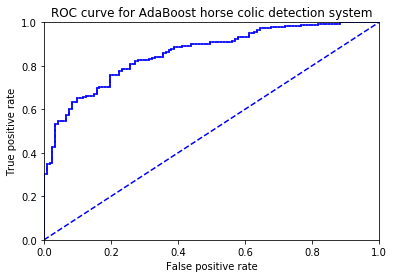

the Area Under the Curve is:  0.8582969635063604


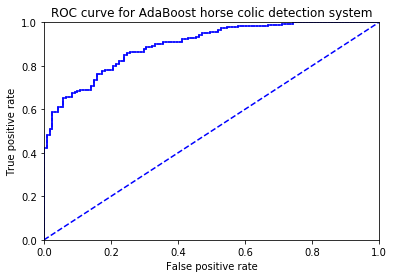

the Area Under the Curve is:  0.8953941870182941


In [13]:
dataArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggClassEst = adaBoostTrainDS(dataArr, labelArr, 10)
plotROC(aggClassEst.T, labelArr)
classifierArray, aggClassEst = adaBoostTrainDS(dataArr, labelArr, 50)
plotROC(aggClassEst.T, labelArr)

对比10个弱分类器下和50个弱分类器，AdaBoost算法性能的结果。

### 基于代价函数的分类器决策控制

除了调节分类器的阈值之外，我们还有一些其他可以用于处理非均衡分类的代价的方法，其中的一种称为代价敏感的学习(cost-sensitive learning)。如果在**构建分类器时，知道了这些代价值，那么就可以选择付出最小代价的分类器**。

![表7-4](https://github.com/tw19941212/Graph-bed/raw/master/%E8%A1%A87-4%E4%B8%80%E4%B8%AA%E4%BA%8C%E7%B1%BB%E9%97%AE%E9%A2%98%E7%9A%84%E4%BB%A3%E4%BB%B7%E7%9F%A9%E9%98%B5.jpg)

第一张表给出的是到目前为止分类器的代价矩阵(代价不是0就是1)。我们可以基于该代价矩阵计算其总代价：$TP*0+FN*1+FP*1+TN*0$。接下来我们考虑下面的第二张表，基于该代价矩阵的分类代价的计算公式为：$TP*(-5)+FN*1+FP*50+TN*0$。**采用第二张表作为代价矩阵时，两种分类错误的代价是不一样的。类似地，这两种正确分类所得到的收益也不一样。**

在分类算法中，我们有很多方法可以用来引入代价信息---在AdaBoost中，可以基于代价函数来调整错误权重向量D。在朴素贝叶斯中，可以选择具有最小期望代价而不是最大概率的类别作为最后的结果。在SVM中，可以在代价函数中对于不同的类别选择不同的参数C。**上述做法就会给较小类更多的权重，即在训练时，小类当中只允许更少的错误。**

### 处理非均衡问题的数据抽样方法

另外一种针对非均衡问题调节分类器的方法，就是对分类器的训练数据进行改造。这可以通过欠抽样(undersampling)或者过抽样(oversampling)来实现。过抽样意味着复制样例，而欠抽样意味着删除样例。不管采用哪种方式，数据都会从原始形式改造为新形式。**抽样过程则可以通过随机方式或者某个预定方式来实现。**

欠抽样方法的一个缺点就在于要确定哪些样例需要进行剔除。但是，在选择剔除的样例中可能携带了剩余样例中并不包含的有价值信息。

上述问题的一种解决办法，就是选择那些离决策边界较远的样例进行删除。有一种替代的策略就是使用反例类别的欠抽样和正例类别的过抽样相混合的方法。  
要对正例类别进行过抽样，我们可以复制已有样例或者加入与已有样例相似的点。一种方法是加入已有数据点的插值点，**但是这种做法可能会导致过拟合的问题。**

## 本章小结

集成方法通过组合多个分类器的分类结果，获得了比简单的单分类器更好的分类结果。本章只介绍了那些**利用同一类分类器的集成方法。**

多个分类器组合可能会进一步凸显出单分类器的不足，比如过拟合问题。**如果分类器之间差别显著，那么多个分类器组合就可能会缓解这一问题**。分类器之间的差别可以是算法本身或者是应用于算法上的数据的不同。

bagging和boosting。在bagging中，是通过随机抽样的替换方式，得到了与原始数据集规模一样的数据集。而boosting在bagging的思路上更进了一步，它在数据集上顺序应用了多个不同的分类器。另一个成功的集成方法就是随机森林，但是由于随机森林不如AdaBoost流行，所以在此并没有对它进行介绍。

介绍了boosting方法中最流行的一个称为AdaBoost的算法。AdaBoost以弱学习器作为基分类器，并且输入数据，使其通过权重向量进行加权。在第一次迭代当中，所有数据都等权重。但是在后续的迭代当中，前次迭代中分错的数据的权重会增大。**这种针对错误的调节能力正是AdaBoost的长处。**

以单层决策树作为弱学习器构建了AdaBoost分类器。实际上，**AdaBoost函数可以应用于任意分类器，只要该分类器能够处理加权数据即可**。AdaBoost算法十分强大，它能够快速处理其他分类器很难处理的数据集。

非均衡分类问题是指在分类器训练时正例数目和反例数目不相等(相差很大)。该问题在错分正例和反例的代价不同时也存在。本章不仅考察了一种不同分类器的评价方法---ROC曲线，还介绍了正确率和召回率这两种在类别重要性不同时度量分类器性能的指标。

本章介绍了通过过抽样和欠抽样方法来调节数据集中的正例和反例数目。另外一种可能更好的非均衡问题的处理方法，就是在训练分类器时将错误的代价考虑在内。